## Assessment

### Problem Statement:
You are given a dataset to predict cognitive test scores of preschoolers given characteristics of their mothers.

### Data dictionary:

- i - mother's IQ
- a - mother's age at child's birth
- h - indicator showing whether mother completed high school (1=True, 0=False) 
- w = 1: mother did not work in first three years of child’s life
- w = 2: mother worked in second or third year of child’s life
- w = 3: mother worked part-time in first year of child’s life
- w = 4: mother worked full-time in first year of child’s life
- score - child's IQ (regressand)

The tasks have been performed sequentially as given in the instructions.md file.

For each task please provide suitable markdown comments and visualizations supporting your work including model diagnostics and evaluation.
You may use any openly available software you need. Present you work in a form of a Jupyter notebook with comments in the markdown cells.
Please upload your ready work to your public github repository and share the link to it with the HR representative.

### 1. Prepare the data, rename variables as you see fit and justify. Propose the types of data for each variable (python data types).

In [285]:
# importing the relavant libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

In [286]:
# reading the text file data.txt
data = data = pd.read_csv('data.txt', sep='|', encoding='latin-1', usecols = ['variable', 'value'])

# remove any special characters from the dataframe using regex 
# except for the period as the data contains float values in the form of strings
data['variable'] = data['variable'].apply(lambda x: re.sub('[^A-Za-z0-9.]+', '', x))
data['value'] = data['value'].apply(lambda x: re.sub('[^A-Za-z0-9.]+', '', x))

# groupby variable and store the values as a list and form a dictionary
data = data.groupby('variable')['value'].apply(list).to_dict()

# remove the key-value pair if it's an empty string: as the empty string would be superfluous
data = {k: v for k, v in data.items() if v != ['']}

# convert the dictionary to a dataframe
data = pd.DataFrame.from_dict(data, orient='index').T
data

,a,h,i,score,w
0,27,1,121.117528602603,65,4
1,25,1,89.3618817100663,98,4
2,27,1,115.443164881725,85,4
3,25,1,99.4496394360723,83,3
4,27,1,92.7457099982118,115,4
...,...,...,...,...,...
429,21,0,84.8774118257353,94,4
430,23,1,92.9903917236843,76,4
431,24,0,94.8597081943671,50,2
432,21,1,96.8566241253673,88,2


In [287]:
# Renaming the columns 
# changing the variable i to mother_iq as the variable i is a reserved keyword in python and the column indicates mother's IQ 
# changing the variable a to mother_age as the a is super abstract and can mean anything
# changing the variable h to hs_completed as the variable h is doesn't give much context 
# and the column indicates whether the mother completed high school or not
# changing the variable w to work_status as the variable w is super abstract and can mean anything 
# and the column indicates the mother's work status
# changing the variable score to child_iq with the same logic as mother_iq variable

data.rename(columns={'i': 'mother_iq', 'a': 'mother_age', 'h': 'hs_completed', 'w': 'work_status', 'score': 'child_iq'}, inplace=True)
data

,mother_age,hs_completed,mother_iq,child_iq,work_status
0,27,1,121.117528602603,65,4
1,25,1,89.3618817100663,98,4
2,27,1,115.443164881725,85,4
3,25,1,99.4496394360723,83,3
4,27,1,92.7457099982118,115,4
...,...,...,...,...,...
429,21,0,84.8774118257353,94,4
430,23,1,92.9903917236843,76,4
431,24,0,94.8597081943671,50,2
432,21,1,96.8566241253673,88,2


In [288]:
# converting the data types of the columns as per the given description and intuition
# Explanation:
# the data type of mother_iq should be integer as the IQ is a whole number and cannot be decimal, 
# I understand the generated score is through some experiment therefore the values are in decimals 
# and hence I have rounded them to nearest integer values as the IQ changes in whole values
# the data type of the variable mother_age should be integer as the age is a whole number
# the data type of hs_completed should be integer as the high school indicator is a whole number
# the data type of work_status should be integer as the work indicator is a whole number
# the data type child_iq should be integer as the score represents IQ and conventionally IQ cannot be decimal.

# rounding the values of column mother_iq to nearest integer
data['mother_iq'] = data['mother_iq'].astype('float').round().astype('int')
data['mother_age'] = data['mother_age'].astype('int')
data['hs_completed'] = data['hs_completed'].astype('int')
data['work_status'] = data['work_status'].astype('int')
data['child_iq'] = data['child_iq'].astype('int')
data

,mother_age,hs_completed,mother_iq,child_iq,work_status
0,27,1,121,65,4
1,25,1,89,98,4
2,27,1,115,85,4
3,25,1,99,83,3
4,27,1,93,115,4
...,...,...,...,...,...
429,21,0,85,94,4
430,23,1,93,76,4
431,24,0,95,50,2
432,21,1,97,88,2


### 2. Transform the data so it's easy to analyze - describe what you did and why?

In [289]:
# I have converted the data-type of the variables mother_iq and child_iq from float to integer 
# as my first step towards transforming the data
# The IQ score is always measured in whole numbers and cannot be in decimals which makes the data easy to analyze. 
# Few other techniques which I used made the data more statistically sound 
# to move further in the data science pipeline is as follows: 

In [290]:
# function to check the missing values in the dataframe
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

# call the function 
missing_values_table(data)

# Since there are no missing values, we can proceed ahead without worry, however, I prefer to treat missing values using KNN-imputation
# as it gives the best possible approximation of the missing values as compared to filling it with zeroes or the mean. 

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


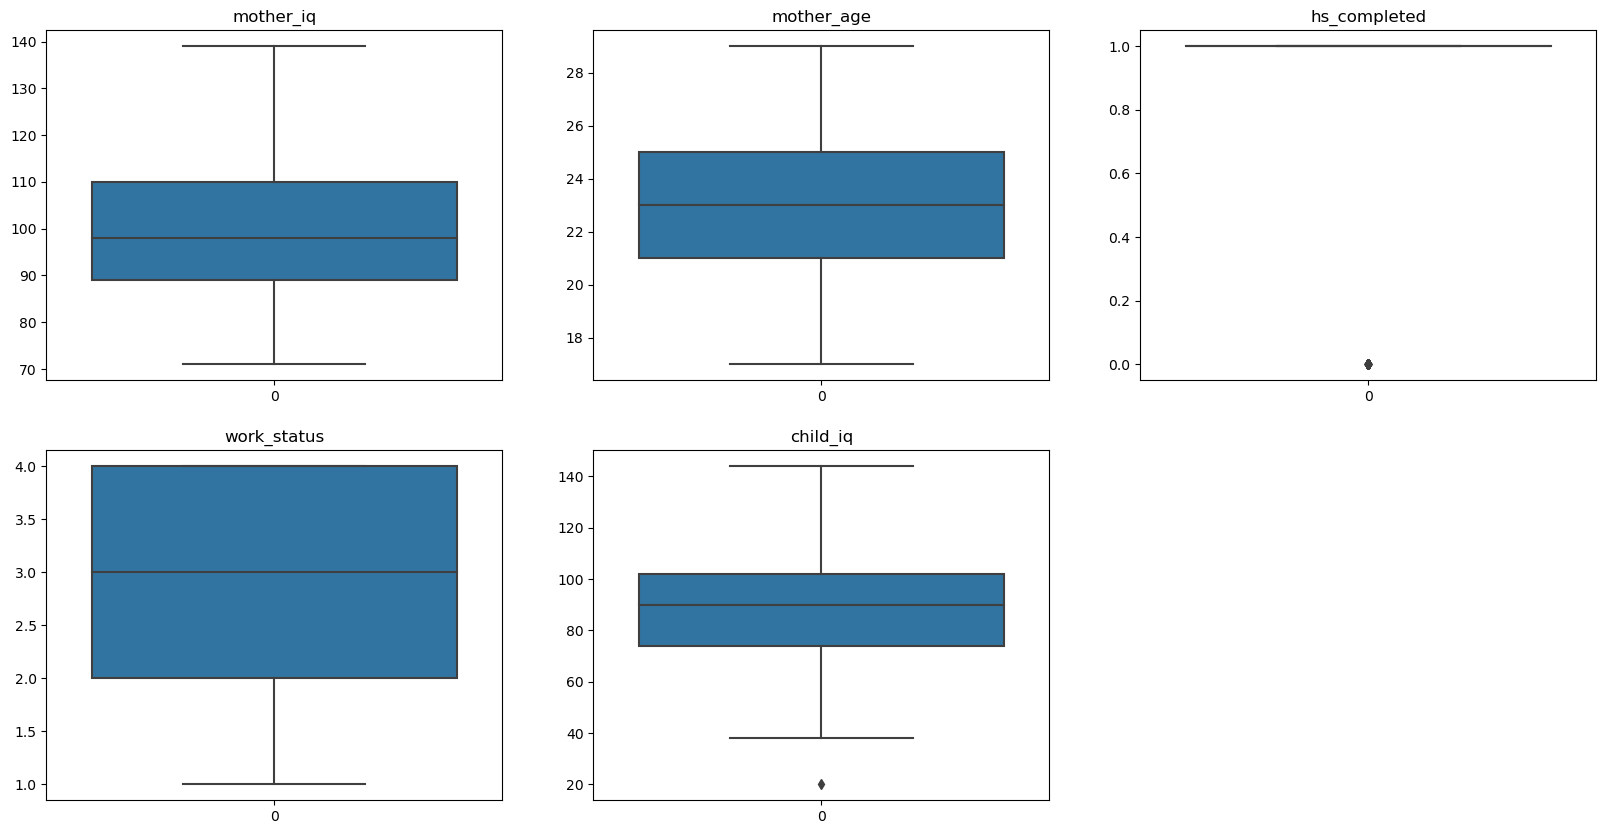

In [291]:
# visualize the outliers using box-plots with proper labels for each column separately

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data = data['mother_iq'])
plt.title('mother_iq')

plt.subplot(2, 3, 2)
sns.boxplot(data = data['mother_age'])
plt.title('mother_age')

plt.subplot(2, 3, 3)
sns.boxplot(data = data['hs_completed'])
plt.title('hs_completed')

plt.subplot(2, 3, 4)
sns.boxplot(data = data['work_status'])
plt.title('work_status')

plt.subplot(2, 3, 5)
sns.boxplot(data = data['child_iq'])
plt.title('child_iq')

plt.show()


In [292]:
# Function to remove outliers from the above dataframe
from scipy import stats
def remove_outliers(df):

    # calculate the z-score for each column
    z = np.abs(stats.zscore(df))
    # remove the outliers
    df = df[(z < 3).all(axis=1)]
    return df

# call the function to remove the outliers
data = remove_outliers(data)
data 

,mother_age,hs_completed,mother_iq,child_iq,work_status
0,27,1,121,65,4
1,25,1,89,98,4
2,27,1,115,85,4
3,25,1,99,83,3
4,27,1,93,115,4
...,...,...,...,...,...
429,21,0,85,94,4
430,23,1,93,76,4
431,24,0,95,50,2
432,21,1,97,88,2


### 3. Perform the exploratory data analysis.

In [293]:
# checking the shape of the data
data.shape
# data has 434 observation and 5 dimensions where child_iq is a regressand.

(433, 5)

In [294]:
# checking the data types of the columns
data.info()
# Data has only integer values.
# No variable column has null/missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 433
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mother_age    433 non-null    int64
 1   hs_completed  433 non-null    int64
 2   mother_iq     433 non-null    int64
 3   child_iq      433 non-null    int64
 4   work_status   433 non-null    int64
dtypes: int64(5)
memory usage: 20.3 KB


In [295]:
# getting summary statistics of the data
data.describe()

,mother_age,hs_completed,mother_iq,child_iq,work_status
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,22.785219,0.787529,100.048499,86.951501,2.898383
std,2.704174,0.409530,15.026364,20.179403,1.181972
min,17.000000,0.000000,71.000000,38.000000,1.000000
25%,21.000000,1.000000,89.000000,74.000000,2.000000
50%,23.000000,1.000000,98.000000,90.000000,3.000000
75%,25.000000,1.000000,110.000000,102.000000,4.000000
max,29.000000,1.000000,139.000000,144.000000,4.000000


In [296]:
# Insights from the above table:
# Here as you can notice mean value is approximately around the median value of each column 
# which is represented by 50%(50th percentile) in index column.
# There is notably not much difference between 75th %tile and max values of predictors.
# Thus observations 1 and 2 suggests that there are little to none Outliers in our data set.

In [297]:
data.child_iq.unique()
# Target variable/Dependent variable is continuous and numerical in nature.

array([ 65,  98,  85,  83, 115,  69, 106, 102,  95,  91,  58,  84,  78,
       110,  99, 105, 101, 100,  87,  96,  72,  77, 130, 109,  92, 107,
        86,  90, 113, 103, 111,  42,  67,  56,  97,  76,  79,  81,  52,
        63,  80,  88,  94, 117,  73, 123, 114,  66, 104, 108,  93,  61,
       112,  49, 122, 136, 116,  89, 119,  45,  57, 144, 121,  64,  75,
        82, 126,  70,  74, 120,  68,  50,  40,  60,  71,  46,  54,  44,
        43,  62,  47,  41,  38,  59])

In [298]:
# Let's just eye ball how our dependent variable looks like.
print(data.child_iq.value_counts())
# getting the values where count is less than 5
print(data.child_iq.value_counts()[data.child_iq.value_counts() < 5])
# we are checking less than 5 to examine how many values are there or whether or not it can negatively influence model training.
# Since, there are 20-25 terms out of over 400 which are less than 5, therefore, it is a good sample representing rare values so we are not discarding them for analysis. 

94     18
104    15
102    14
87     13
100    12
       ..
45      1
130     1
66      1
123     1
59      1
Name: child_iq, Length: 84, dtype: int64
75     4
112    4
61     4
77     4
108    4
82     4
74     4
103    4
111    4
67     4
72     4
46     3
60     3
119    3
116    3
54     3
114    3
49     3
41     3
122    2
117    2
115    2
120    2
70     2
136    2
121    2
63     2
57     2
62     2
43     2
47     1
38     1
44     1
144    1
71     1
40     1
126    1
45     1
130    1
66     1
123    1
59     1
Name: child_iq, dtype: int64


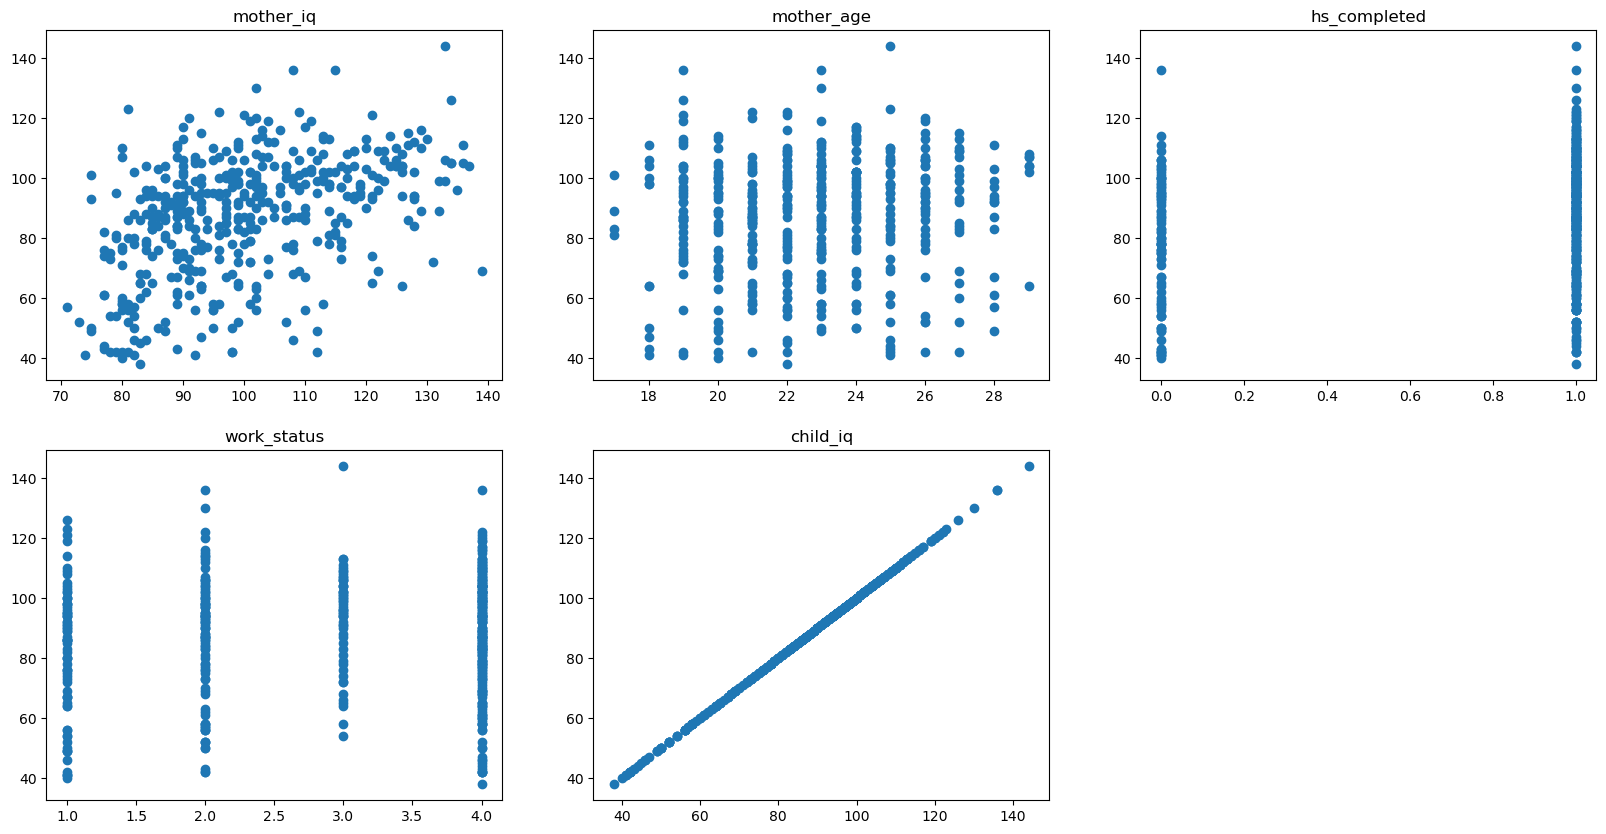

In [299]:
# visualize the data using scatter plots for each column separately
# scatter plot gives a good sense of the data distribution against the dependent variable; therefore it's an obvious choice to start with.

plt.figure(figsize=(20, 10))


plt.subplot(2, 3, 1)
plt.scatter(data['mother_iq'], data['child_iq'])
plt.title('mother_iq')


plt.subplot(2, 3, 2)
plt.scatter(data['mother_age'], data['child_iq'])
plt.title('mother_age')

plt.subplot(2, 3, 3)
plt.scatter(data['hs_completed'], data['child_iq'])
plt.title('hs_completed')

plt.subplot(2, 3, 4)
plt.scatter(data['work_status'], data['child_iq'])
plt.title('work_status')

plt.subplot(2, 3, 5)
plt.scatter(data['child_iq'], data['child_iq'])
plt.title('child_iq')

plt.show()

In [300]:
# if we observed the above graphs we can see the following: 
# 1. mother_iq and child_iq are positively correlated and have an almost linear relationship.
# 2. mother_age and child_iq are barely having any correlation.
# 3. similarly, hs_completed and work_status are also not having any correlation with child_iq.

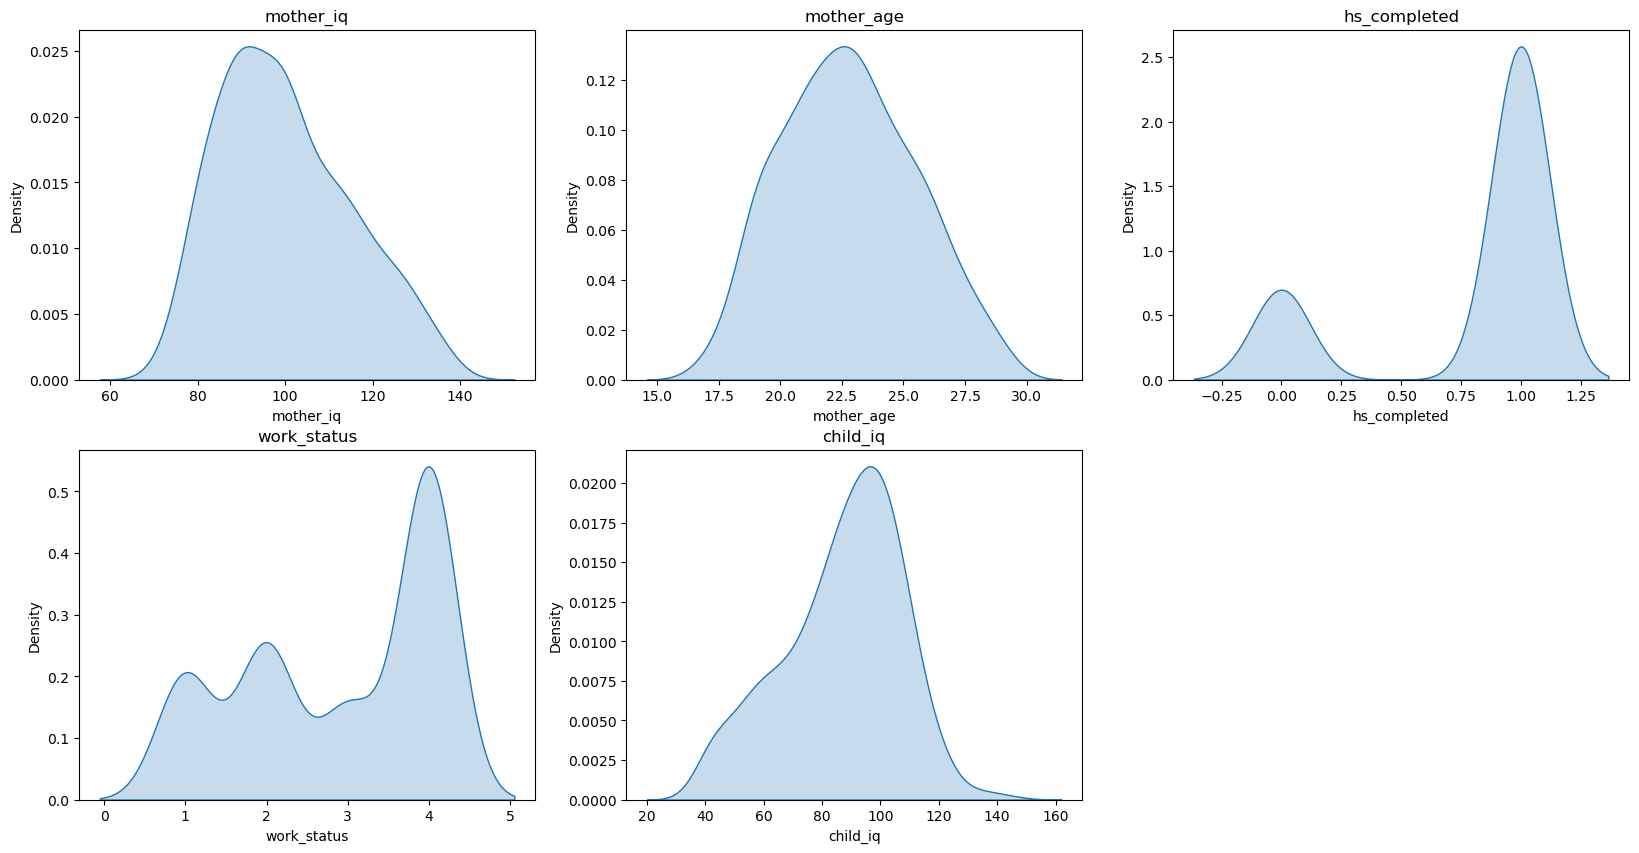

In [301]:
# visualize the data using Kernal Density Estimate for each column separately
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.kdeplot(data['mother_iq'], shade=True)
plt.title('mother_iq')

plt.subplot(2, 3, 2)
sns.kdeplot(data['mother_age'], shade=True)
plt.title('mother_age')

plt.subplot(2, 3, 3)
sns.kdeplot(data['hs_completed'], shade=True)
plt.title('hs_completed')

plt.subplot(2, 3, 4)
sns.kdeplot(data['work_status'], shade=True)
plt.title('work_status')

plt.subplot(2, 3, 5)
sns.kdeplot(data['child_iq'], shade=True)
plt.title('child_iq')

plt.show()

In [ ]:
# The above graphs show that the continuous variables are normally distributed and not much skewed as well. 
# The categorical variables are also not skewed and are distributed evenly.
# An interesting observation is that more than 50% of the mothers worked full-time in the first year of child birth.

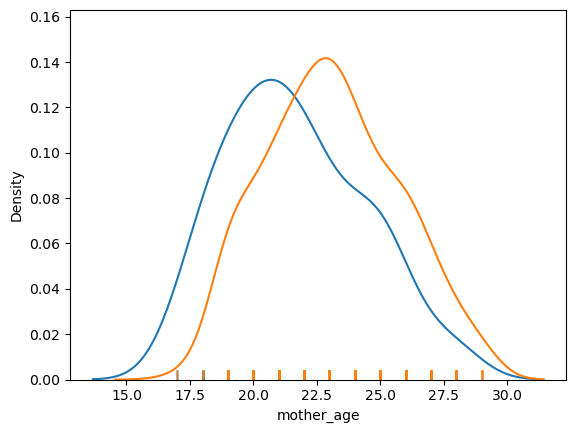

In [302]:
# Some extra insight that might be useful in the analysis.
# plot the distribution graph for the age of mother where hs_completed is 0
import seaborn as sns
sns.distplot(data[data['hs_completed'] == 0]['mother_age'], hist=False, rug=True)

# plot the distribution graph for the age of mother where hs_completed is 1
sns.distplot(data[data['hs_completed'] == 1]['mother_age'], hist=False, rug=True)
plt.show()

In [303]:
# As can be seen from the above graph, blue curve represents the distribution of mother's age who haven't completed high school
# and orange curve represents the same disctribution for the mothers who have completed high school.
# Interesting fact to notice is that the mothers are younger who did not attend the high school. 
# I am positive regarding the fact that if we have more data, then these graphs will be more separated and we can see the difference more clearly.
# Purpose of this given we have more records, then a clustering analyis can be performed prior to model training, 
# but we will proceed with the given data as it is.

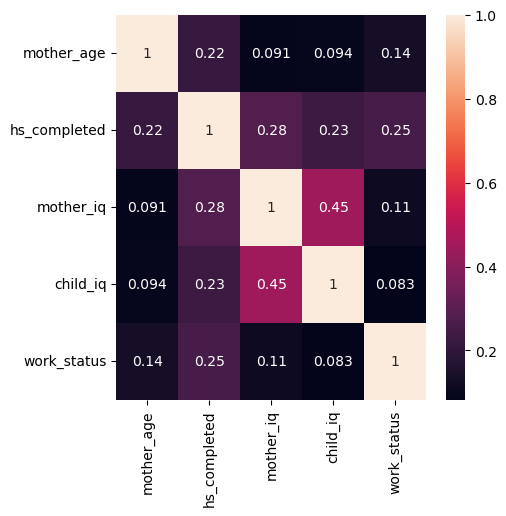

In [304]:
# correlation matrix heatmap of all the variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [305]:
# According to the above heatmap, we can see that mother_iq and child_iq are highly correlated with each other. 
# Similarly, hs_completed also have a good effect on the child_iq.
# Moreover, hs_completed and mother_age are also correlated with each other. Which indicate some multicollinearity.
# We will check the VIF values to see if we need to drop any of the variables.

In [306]:
# calculate the VIF score for each column to check for multi-colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['Features'] = data.columns
# arrange the columns in descending order of VIF score
vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
0,34.541472,mother_age
1,5.456904,hs_completed
2,45.878652,mother_iq
3,24.571409,child_iq
4,7.496477,work_status


In [307]:
# As we can observe there is some multi-colinearity between the predictors. However, we included the dependent variable as well.
# Let's remove the dependent variable 'child_iq' and observe the VIF score again.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data[['mother_iq', 'mother_age', 'hs_completed', 'work_status']].values, i) for i in range(data[['mother_iq', 'mother_age', 'hs_completed', 'work_status']].shape[1])]
vif['Features'] = data[['mother_iq', 'mother_age', 'hs_completed', 'work_status']].columns
# arrange the columns in descending order of VIF score
vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
0,33.015917,mother_iq
1,33.434303,mother_age
2,5.415536,hs_completed
3,7.494006,work_status


In [308]:
# The VIF table confirms our observation from the multicolinearity heatmap.
# We can see that mother_iq and mother_age are highly correlated with each other.
# Therefore, we can consider dropping the mother_age column from the dataset 
# as it has little to no effect on child_iq and we might get better results. 
# Or we might want to explore techniques like PCA or PLS for dimensionality reduction if necessary. 

### 4. Perform a linear regression where the regressand is child's IQ
1. using a single predictor
2. using multiple predictors
3. using multiple predictors with an interaction term
#### For each case, explain your model, model assumptions and how to interpret the regression coefficients.

In [309]:
# converting work_status column using one hot encoding 
# data = pd.get_dummies(data, columns=['work_status'])
# data

In [310]:
# Linear Regression using statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [311]:
# 1. Using a single predictor
# Create the regression object using a single predictor i.e., mother_iq
reg = ols('child_iq ~ mother_iq' , data=data)
# Fit the regression
reg_result = reg.fit()
# Print the summary
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     107.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.18e-22
Time:                        19:30:04   Log-Likelihood:                -1866.7
No. Observations:                 433   AIC:                             3737.
Df Residuals:                     431   BIC:                             3745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8959      5.854      4.594      0.000      15.390      38.402
mother_iq      0.6003      0.058     10.374      0.000       0.487       0.714
==============================================================================
Omnibus:                        6.376   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.521
Skew:                          -0.288   Prob(JB):                       0.0384
Kurtosis:                       2.825   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
# Create the regression object using a single predictor i.e., hs_completed
reg = ols('child_iq ~ C(hs_completed)' , data=data).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     23.24
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.98e-06
Time:                        19:30:04   Log-Likelihood:                -1903.5
No. Observations:                 433   AIC:                             3811.
Df Residuals:                     431   BIC:                             3819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.1739      2.052     38.102      0.000      74.141      82.206
C(hs_completed)[T.1]    11.1457      2.312      4.821      0.000       6.602      15.690
==============================================================================
Omnibus:                       10.939   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.773
Skew:                          -0.351   Prob(JB):                      0.00458
Kurtosis:                       2.676   Cond. No.                         4.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
# Create the regression object using a single predictor i.e., hs_completed
reg = ols('child_iq ~ C(work_status)' , data=data).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.599
Date:                Wed, 11 Jan 2023   Prob (F-statistic):             0.0136
Time:                        19:30:04   Log-Likelihood:                -1909.5
No. Observations:                 433   AIC:                             3827.
Df Residuals:                     429   BIC:                             3843.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              82.0000      2.279     35.978      0.000      77.520      86.480
C(work_status)[T.2]     4.5474      3.067      1.483      0.139      -1.480      10.575
C(work_status)[T.3]    11.5000      3.512      3.274      0.001       4.596      18.404
C(work_status)[T.4]     5.2098      2.673      1.949      0.052      -0.044      10.464
==============================================================================
Omnibus:                       11.912   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.736
Skew:                          -0.367   Prob(JB):                      0.00283
Kurtosis:                       2.666   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
# 2. using multiple predictors
reg = ols('child_iq ~ mother_iq + mother_age + C(hs_completed) + C(work_status)' , data = data).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     19.96
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.38e-20
Time:                        19:30:04   Log-Likelihood:                -1861.3
No. Observations:                 433   AIC:                             3737.
Df Residuals:                     426   BIC:                             3765.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.1840      9.292      2.172      0.030       1.920      38.448
C(hs_completed)[T.1]     4.7915      2.311      2.074      0.039       0.250       9.333
C(work_status)[T.2]      3.6866      2.794      1.320      0.188      -1.805       9.178
C(work_status)[T.3]      5.6740      3.219      1.763      0.079      -0.653      12.001
C(work_status)[T.4]      1.6057      2.491      0.645      0.520      -3.291       6.502
mother_iq                0.5492      0.061      9.059      0.000       0.430       0.668
mother_age               0.2522      0.330      0.764      0.446      -0.397       0.901
==============================================================================
Omnibus:                        5.578   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.657
Skew:                          -0.260   Prob(JB):                       0.0591
Kurtosis:                       2.795   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
# this time we will only included mother_iq and hs_completed as predictors
reg = ols('child_iq ~ mother_iq + C(hs_completed)' , data = data).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     57.47
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.57e-23
Time:                        19:30:04   Log-Likelihood:                -1863.6
No. Observations:                 433   AIC:                             3733.
Df Residuals:                     430   BIC:                             3745.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.7551      5.820      4.597      0.000      15.315      38.195
C(hs_completed)[T.1]     5.4170      2.198      2.464      0.014       1.096       9.738
mother_iq                0.5590      0.060      9.331      0.000       0.441       0.677
==============================================================================
Omnibus:                        6.646   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.746
Skew:                          -0.286   Prob(JB):                       0.0343
Kurtosis:                       2.786   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# Let's drop the variable mother_age and see if we get better results
reg = ols('child_iq ~ mother_iq + C(hs_completed)' , data = data.drop('mother_age', axis=1)).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     57.47
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.57e-23
Time:                        19:30:04   Log-Likelihood:                -1863.6
No. Observations:                 433   AIC:                             3733.
Df Residuals:                     430   BIC:                             3745.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.7551      5.820      4.597      0.000      15.315      38.195
C(hs_completed)[T.1]     5.4170      2.198      2.464      0.014       1.096       9.738
mother_iq                0.5590      0.060      9.331      0.000       0.441       0.677
==============================================================================
Omnibus:                        6.646   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.746
Skew:                          -0.286   Prob(JB):                       0.0343
Kurtosis:                       2.786   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# Variable selection: Benjamini Hochberg Procedure
full_lr = ols('child_iq ~ mother_iq + mother_age + C(hs_completed) + C(work_status)', data=data).fit()
df_coefs = full_lr.summary2().tables[1].sort_values('P>|t|')

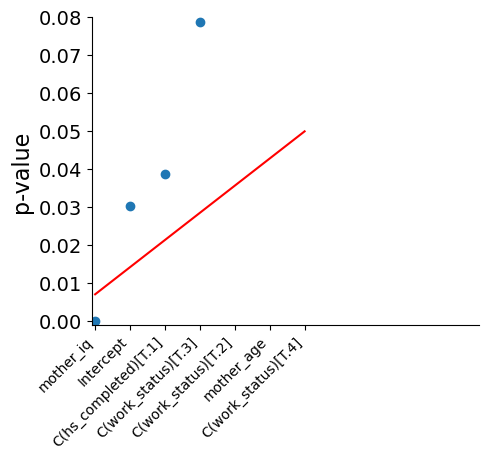

In [318]:
n_vars = len(df_coefs)

plt.figure(figsize=(5, 4))

plt.plot(range(1, n_vars+1), df_coefs['P>|t|'], linewidth=0, marker='o')
plt.plot(range(1, n_vars+1), [0.05*i/n_vars for i in range(1, n_vars+1)], color='red')

plt.ylim([-0.001, 0.08])
plt.xlim([0.9, 12])

plt.xticks(ticks=range(1, n_vars+1), labels=df_coefs.index, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.ylabel('p-value', fontsize=16)

sns.despine()

In [319]:
# Observation from the above graph:
# 1. mother_iq and hs_completed are the only variables that are significant at 5% level.
# 2. mother_age and work_status are not significant at 5% level therefore not good predictors.

In [320]:
# According to the above models, linear regression is able to capture the relationship and giving good idea about the coefficients
# but not a good model choice for prediction. 
# Let's try piecewise linear regression to see if we can get better results.

In [321]:
# Piecewise Linear Regression 
import pwlf

#fit your data (x and y)
myPWLF = pwlf.PiecewiseLinFit(data['mother_iq'], data['child_iq'])

#fit the data for n line segments
z = myPWLF.fit(5)

#calculate slopes
slopes = myPWLF.calc_slopes()

# predict for the determined points
xHat = data['mother_iq']  
yHat = myPWLF.predict(xHat)

#calculate statistics
p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
se = myPWLF.se  # standard errors
rsq = myPWLF.r_squared() # R^2
print('R^2 values: ', rsq)

R^2 values:  0.2550401886284446


In [322]:
# As we can see R-squared improved a little bit which indicates that fitting a linear line on the entire data 
# is not ideal. The data is behaving differntly for differnt ranges of mother_iq.

In [323]:
# 3. using multiple predictors with interaction terms
# Let's try to find out a good interaction variable
# According to the given data an interaction 
# Let's make a copy of the dataframe and create a new column in the dataset
data2 = data.copy()
data2['mother_iq_hs_completed'] = data2['mother_iq'] * data2['hs_completed']
data2

,mother_age,hs_completed,mother_iq,child_iq,work_status,mother_iq_hs_completed
0,27,1,121,65,4,121
1,25,1,89,98,4,89
2,27,1,115,85,4,115
3,25,1,99,83,3,99
4,27,1,93,115,4,93
...,...,...,...,...,...,...
429,21,0,85,94,4,0
430,23,1,93,76,4,93
431,24,0,95,50,2,0
432,21,1,97,88,2,97


In [324]:
# Let's try to fit a linear regression model with interaction term
reg = ols('child_iq ~ mother_iq + C(hs_completed) + mother_iq_hs_completed' , data = data2).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     41.61
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.28e-23
Time:                        19:30:20   Log-Likelihood:                -1859.6
No. Observations:                 433   AIC:                             3727.
Df Residuals:                     429   BIC:                             3744.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.2308     13.641     -0.603      0.547     -35.042      18.581
C(hs_completed)[T.1]      48.0092     15.203      3.158      0.002      18.127      77.891
mother_iq                  0.9394      0.147      6.394      0.000       0.651       1.228
mother_iq_hs_completed    -0.4548      0.161     -2.831      0.005      -0.771      -0.139
==============================================================================
Omnibus:                        7.263   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.464
Skew:                          -0.313   Prob(JB):                       0.0239
Kurtosis:                       2.849   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [325]:
# Let's try to find out another interaction variable
# Another good candidate for interaction variable can be mother_iq and mother_age
# Let's create a new column in the dataset
data2['mother_iq_mother_age'] = data2['mother_iq'] * data2['mother_age']
data2

,mother_age,hs_completed,mother_iq,child_iq,work_status,mother_iq_hs_completed,mother_iq_mother_age
0,27,1,121,65,4,121,3267
1,25,1,89,98,4,89,2225
2,27,1,115,85,4,115,3105
3,25,1,99,83,3,99,2475
4,27,1,93,115,4,93,2511
...,...,...,...,...,...,...,...
429,21,0,85,94,4,0,1785
430,23,1,93,76,4,93,2139
431,24,0,95,50,2,0,2280
432,21,1,97,88,2,97,2037


In [326]:
# Let's try to fit a linear regression model with interaction term
reg = ols('child_iq ~ mother_iq + mother_age + mother_iq_mother_age' , data = data2).fit().summary()
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               child_iq   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     36.72
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.85e-21
Time:                        19:30:20   Log-Likelihood:                -1865.4
No. Observations:                 433   AIC:                             3739.
Df Residuals:                     429   BIC:                             3755.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -29.7612     50.997     -0.584      0.560    -129.996      70.474
mother_iq                1.0693      0.498      2.146      0.032       0.090       2.049
mother_age               2.4753      2.185      1.133      0.258      -1.820       6.771
mother_iq_mother_age    -0.0204      0.021     -0.961      0.337      -0.062       0.021
==============================================================================
Omnibus:                        6.874   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.025
Skew:                          -0.297   Prob(JB):                       0.0298
Kurtosis:                       2.810   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
# As per the above results, the only improvement we observed including the interaction term is in the R-squared value
# with mother_iq and hs_completed interaction term. Other interaction terms are not significant at 5% level and not 
# improving the performance beyond the original model. 

In [328]:
# Before training the model using sklearn we need to one hot encode the categorical variables
# The statsmodel automatically takes care of the categorical variables but here we need to do it explicitly. 
# One hot encoding work_status column in the original dataset
data = pd.get_dummies(data, columns=['work_status'])
data

,mother_age,hs_completed,mother_iq,child_iq,work_status_1,work_status_2,work_status_3,work_status_4
0,27,1,121,65,0,0,0,1
1,25,1,89,98,0,0,0,1
2,27,1,115,85,0,0,0,1
3,25,1,99,83,0,0,1,0
4,27,1,93,115,0,0,0,1
...,...,...,...,...,...,...,...,...
429,21,0,85,94,0,0,0,1
430,23,1,93,76,0,0,0,1
431,24,0,95,50,0,1,0,0
432,21,1,97,88,0,1,0,0


In [330]:
# As an attempt to further optimize the performance we can use 
# Linear Regression with Lasso Penalty. 
# Let's try and see if we are getting a better performance.

# Linear Regression with Lasso Penalty for single feature
X = data['mother_iq'].values.reshape(-1, 1)
y = data['child_iq']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

# Predicting the test set results
y_pred = lasso.predict(X_test)

# Calculating the R-squared value
r2_score(y_test, y_pred)

0.15346428947386914

In [340]:
# Linear Regression with Lasso Penalty for multiple features
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Splitting the data into train and test

X = data.drop(['child_iq'], axis=1)
y = data['child_iq']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
lasso = Lasso(alpha = 0.1, normalize=True)
lasso.fit(X_train, y_train)

# Predicting the test set results
y_pred = lasso.predict(X_test)

# Calculating the R-squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.15346428947386914

In [279]:
# According to the above results, we can see that the performance of the model is not improved by using Lasso penalty.
# The R-squared value is almost same as the original model.
# The best performing model as of now is Piecewise Linear Regression with 5 segments.

In [341]:
# Lastly let's try to find out feature importance. 
# Calculating the feature importance using sklearn
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':lasso.coef_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
1,hs_completed,3.634983
2,mother_iq,0.459022
5,work_status_3,0.013775
0,mother_age,0.000000
3,work_status_1,-0.000000
4,work_status_2,0.000000
6,work_status_4,-0.000000


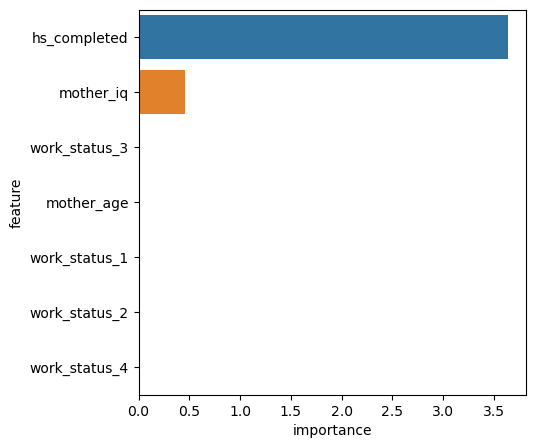

In [342]:
# Plotting the feature importance
plt.figure(figsize=(5,5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()

In [ ]:
# To my surprise, the most importance feature is hs_completed when we take lasso penalty into account.
# However, according to the pre model training analysis mother_iq seemed to be the most important. 
# The possible reason is the multicollinearity between mother_iq and mother_age.
# But the good news is mother_iq and hs_completed are the most important features in both the models.